In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from copy import deepcopy

import importlib
import sys
sys.path.insert(0, "/Users/rowanbrackston/Box Sync/GitRepos/NN-control/src")

print(tf.__version__)

2.1.0


In [17]:
import euler
importlib.reload(sys.modules['euler'])
import systems
importlib.reload(sys.modules['systems'])

<module 'systems' from '/Users/rowanbrackston/Box Sync/GitRepos/NN-control/src/systems.py'>

In [3]:
G = systems.VDPOscillator()
K = systems.DenseSeqControl()

In [4]:
class ClosedLoop():
    """
    Class for the closed loop system, taking a plant and controller during construction
    """
    
    def __init__(self, plant, controller):
        self.plant = plant
        self.controller = controller
    
    def forward(self, t,x):
        return self.plant(x,t) + self.controller(x,t)
        

In [6]:
loop = ClosedLoop(G,K)

x0 = tf.constant([[1.0],[1.0]], tf.float32)
x0 = tf.reshape(x0, [-1,G.nStates,1])
loop.forward(0.0,x0)

<tf.Tensor: shape=(1, 2, 1), dtype=float32, numpy=
array([[[ 1.      ],
        [-0.904947]]], dtype=float32)>

In [18]:
trajectory = euler.fwd(loop, x0, 10)

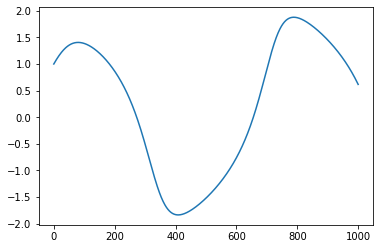

In [21]:
np.shape(trajectory)
plt.plot(trajectory[:,0,0,0])